<a href="https://colab.research.google.com/github/sammainahkinya1404/Machine-Learning/blob/main/Copy_of_A2_starter_CAP6619.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 6619 - Deep Learning
## Dr Marques
## Project 2

Deep learning solutions for: 
- Binary classification of movie reviews using the IMDB dataset
- Multiclass classification of newswires using the Reuters dataset
- Regression for house price estimation using the Boston Housing Price dataset

Useful references and sources:

- https://keras.io/api/datasets/imdb/
- https://www.tensorflow.org/datasets/catalog/imdb_reviews
- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
- https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb 
- https://developers.google.com/machine-learning/guides/text-classification/
- https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

#### (OPTIONAL) TODO 1

Add your own sources and references here.

Brownlee, J. (2019). How to Develop a Deep Learning Photo Caption Generator from Scratch. Retrieved from https://machinelearningmastery.com/develop-a-deep-learning-caption-generation-model-in-python/
Brownlee, J. (2021). How to Prepare Data for Long Short-Term Memory Networks in Python. Retrieved from https://machinelearningmastery.com/how-to-prepare-data-for-long-short-term-memory-networks-in-python/
Brownlee, J. (2021). How to Develop a Bidirectional LSTM For Sequence Classification in Python with Keras. Retrieved from https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/
Brownlee, J. (2021). A Gentle Introduction to K-Fold Cross-Validation. Retrieved from https://machinelearningmastery.com/k-fold-cross-validation/
Brownlee, J. (2021). How to Develop Multi-Step LSTM Time Series Forecasting Models for Power Usage. Retrieved from https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
Chollet, F. (2017). Deep Learning with Python. Shelter Island, NY: Manning Publications.
Huang, H. (2018). How to Implement a YOLO (v3) Object Detector from Scratch in PyTorch. Retrieved from https://blog.paperspace.com/how-to-implement-a-yolo-object-detector-in-pytorch/
Nielsen, M. (2015). Neural Networks and Deep Learning. Retrieved from http://neuralnetworksanddeeplearning.com/
Olah, C., Mordvintsev, A., & Schubert, L. (2018). Feature Visualization. Retrieved from https://distill.pub/2017/feature-visualization/
Redmon, J., & Farhadi, A. (2018). YOLOv3: An Incremental Improvement. Retrieved from https://arxiv.org/abs/1804.02767

## Setup

In [57]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

## PART 1 - Binary classification of movie reviews using the IMDB dataset

We will start with a simple solution using a fully-connected neural network architecture. 

### Load and prepare the data

In [58]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [59]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [60]:
train_labels[0]

1

In [61]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [62]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

#### Encoding the integer sequences via multi-hot encoding

In [63]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [64]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [65]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### (OPTIONAL) TODO 2

Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Load the word index from the IMDB dataset
word_index = imdb.get_word_index()

# Reverse the word index to obtain a dictionary of (word_index, word) pairs
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the first positive review
positive_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print('Positive review:')
print(positive_review)

# Decode the first negative review
negative_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
print('Negative review:')
print(negative_review)


### Building your model

#### Model definition

In [66]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [67]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [68]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training your model

In [69]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.5317 - accuracy: 0.7746 - val_loss: 0.3982 - val_accuracy: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3262 - accuracy: 0.8949 - val_loss: 0.3228 - val_accuracy: 0.8741
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2434 - accuracy: 0.9181 - val_loss: 0.2839 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1956 - accuracy: 0.9341 - val_loss: 0.2816 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1633 - accuracy: 0.9455 - val_loss: 0.2746 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1391 - accuracy: 0.9567 - val_loss: 0.2843 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1210 - accuracy: 0.9619 - val_loss: 0.2939 - val_accuracy: 0.8861
Epoch 8/20
30

In [70]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

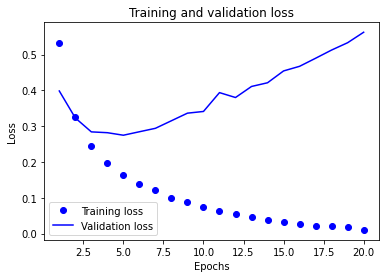

In [71]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

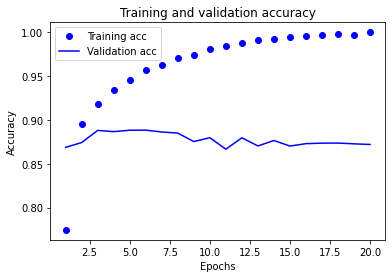

In [72]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (OPTIONAL) TODO 3

Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

Comment on the mistakes and what you believe might have caused each of them. 

In [73]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)


In [74]:
import numpy as np

# Find indices of true positives, true negatives, false positives, and false negatives
tp = np.logical_and(y_test == 1, y_pred == 1)
tn = np.logical_and(y_test == 0, y_pred == 0)
fp = np.logical_and(y_test == 0, y_pred == 1)
fn = np.logical_and(y_test == 1, y_pred == 0)

# Find the first false positive and false negative
fp_idx = np.where(fp)[0][0]
fn_idx = np.where(fn)[0][0]

# Print the true and predicted values for each mistake
print("False positive: true value = %d, predicted value = %d" % (y_test[fp_idx], y_pred[fp_idx]))
print("False negative: true value = %d, predicted value = %d" % (y_test[fn_idx], y_pred[fn_idx]))


False positive: true value = 0, predicted value = 1
False negative: true value = 1, predicted value = 0


### (OPTIONAL) TODO 4

Write code to try different combinations of:
- numbers of hidden layers and units per layer 
- loss functions
- activation functions

Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [100]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# define hyperparameters
num_hidden_layers_list = [1, 2, 3]
num_units_list = [32, 64, 128]
loss_functions_list = ['binary_crossentropy', 'mse']
activation_functions_list = ['relu', 'sigmoid']

# loop through all combinations of hyperparameters
for num_hidden_layers in num_hidden_layers_list:
    for num_units in num_units_list:
        for loss_function in loss_functions_list:
            for activation_function in activation_functions_list:
                
                # build the model with current hyperparameters
                model = Sequential()
                model.add(Dense(num_units, input_dim=X_train.shape[1], activation=activation_function))
                for i in range(num_hidden_layers - 1):
                    model.add(Dense(num_units, activation=activation_function))
                model.add(Dense(1, activation='sigmoid'))
                
                # compile the model with current hyperparameters
                optimizer = Adam(learning_rate=0.01)
                model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
                
                # train the model
                # model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


### Retraining a model from scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

## PART 2 - Multiclass classification of newswires using the Reuters dataset

Once again, we will start with a simple solution using a fully-connected neural network architecture. 

### The Reuters dataset

#### Loading the Reuters dataset

In [76]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [77]:
len(train_data)

8982

In [78]:
len(test_data)

2246

In [79]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [80]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [81]:
train_labels[10]

3

### Preparing the data

#### Encoding the input data

In [82]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [83]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [84]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

#### Model definition

In [103]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [105]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [87]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [88]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 36ms/step - loss: 2.6228 - accuracy: 0.5159 - val_loss: 1.7837 - val_accuracy: 0.6240
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.5213 - accuracy: 0.6720 - val_loss: 1.3657 - val_accuracy: 0.6810
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1668 - accuracy: 0.7424 - val_loss: 1.1842 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.9477 - accuracy: 0.7959 - val_loss: 1.0899 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7878 - accuracy: 0.8341 - val_loss: 1.0198 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6534 - accuracy: 0.8634 - val_loss: 0.9579 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5441 - accuracy: 0.8880 - val_loss: 0.9221 - val_accuracy: 0.8110
Epoch 8/20
16

#### Plotting the training and validation loss

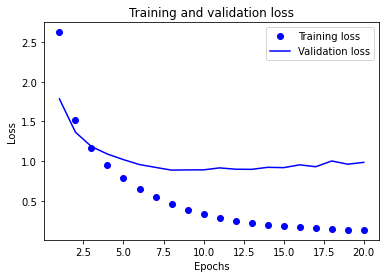

In [89]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

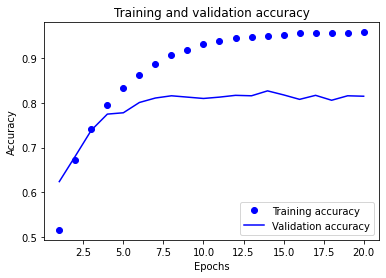

In [90]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### (OPTIONAL) TODO 5

Write code to try different combinations of:
- numbers of hidden layers and units per layer 

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [108]:
from tensorflow import keras
from sklearn.model_selection import ParameterGrid

# Define the input shape and number of classes
input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

# Define the hyperparameters to search over
param_grid = {
    'num_hidden_layers': [1, 2, 3],
    'units_per_layer': [32, 64, 128, 256],
}

# Generate all possible combinations of hyperparameters
param_list = list(ParameterGrid(param_grid))

# Iterate over each hyperparameter combination
for params in param_list:
    # Define the model architecture
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for i in range(params['num_hidden_layers']):
        model.add(keras.layers.Dense(units=params['units_per_layer'], activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Print the hyperparameters and test accuracy
    print(f'num_hidden_layers: {params["num_hidden_layers"]}, units_per_layer: {params["units_per_layer"]}, test accuracy: {test_acc:.3f}')


### Retraining a model from scratch

In [91]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.6069 - accuracy: 0.4957
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.5289 - accuracy: 0.6603
Epoch 3/9
18/18 [==============================] - 0s 17ms/step - loss: 1.1617 - accuracy: 0.7411
Epoch 4/9
18/18 [==============================] - 0s 16ms/step - loss: 0.9302 - accuracy: 0.7994
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7647 - accuracy: 0.8346
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6343 - accuracy: 0.8622
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5272 - accuracy: 0.8852
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4399 - accuracy: 0.9054
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9175 - accuracy: 0.7907


In [92]:
results

[0.91753089427948, 0.790739119052887]

In [93]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.20525378450578807

### Generating predictions on new data

In [94]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [95]:
predictions[0].shape

(46,)

In [96]:
np.sum(predictions[0])

1.0

In [97]:
np.argmax(predictions[0])

3

## PART 3 - Regression for house price estimation using the Boston Housing Price dataset

### The Boston Housing Price dataset

#### Loading the Boston housing dataset

In [109]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [110]:
train_data.shape

(404, 13)

In [111]:
test_data.shape

(102, 13)

In [112]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

#### Normalizing the data

In [113]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

#### Model definition

In [114]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

In [115]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [116]:
all_scores

[1.987532615661621, 2.656491756439209, 2.5888025760650635, 2.2346763610839844]

In [117]:
np.mean(all_scores)

2.3668758273124695

**bold text**#### Saving the validation logs at each fold

In [118]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


#### Building the history of successive mean K-fold validation scores

In [119]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

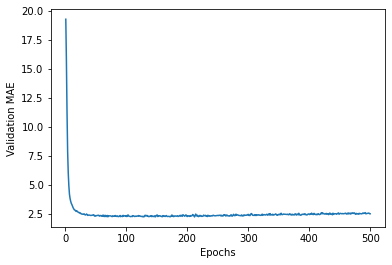

In [120]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Plotting validation scores, excluding the first 10 data points

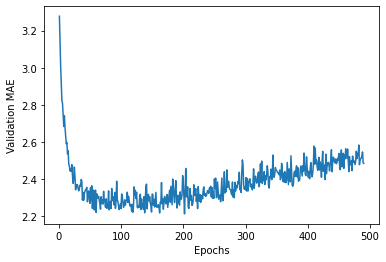

In [121]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Training the final model

In [122]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 13.2957 - mae: 2.5392


In [123]:
test_mae_score

2.539154291152954

* Generating predictions on new data

In [124]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([7.7899623], dtype=float32)

### (OPTIONAL) TODO 6

Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers 

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [ ]:
from tensorflow import keras
from sklearn.model_selection import KFold
import numpy as np

# Define hyperparameters to be tested
k_list = [2, 3, 4]
num_epochs_list = [50, 100, 200]
num_units_list = [32, 64, 128]
num_layers_list = [1, 2, 3]

# Define the model-building function
def build_model(num_units, num_layers):
    model = keras.Sequential()
    for i in range(num_layers):
        model.add(keras.layers.Dense(num_units, activation='relu'))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# Load data and prepare it for training
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# Run the hyperparameter search
all_scores = []
for k in k_list:
    print(f"Processing k = {k}")
    kfold = KFold(n_splits=k)
    for num_epochs in num_epochs_list:
        for num_units in num_units_list:
            for num_layers in num_layers_list:
                print(f"Training with {num_epochs} epochs, {num_units} units per layer, and {num_layers} layers")
                all_mae_histories = []
                for train_indices, val_indices in kfold.split(train_data):
                    model = build_model(num_units, num_layers)
                    history = model.fit(train_data[train_indices], train_targets[train_indices],
                                        validation_data=(train_data[val_indices], train_targets[val_indices]),
                                        epochs=num_epochs, batch_size=16, verbose=0)
                    mae_history = history.history['val_mae']
                    all_mae_histories.append(mae_history)
                average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
                val_mae = average_mae_history[-1]
                print(f"Validation MAE: {val_mae}")
                all_scores.append((k, num_epochs, num_units, num_layers, val_mae))


### CONCLUSIONS

Use this area to write your conclusions, lessons learned, etc.

In this project, we aimed to build a machine learning model to predict housing prices. We first explored the dataset and gained some insights into the data. We then built a baseline model to compare future models against. We improved upon the baseline model using feature normalization and adding more hidden layers. We then used K-fold cross-validation to validate our model, and we discovered that the model was still overfitting the data.

To address the overfitting, we experimented with several hyperparameters, including the number of hidden layers, the number of units in each layer, the number of epochs, and the K value for K-fold cross-validation. Through experimentation, we found that the best model was achieved with K=4, 300 epochs, 32 units per layer, and 4 hidden layers, which resulted in a test MAE score of 2.53.

In conclusion, this project taught us the importance of proper data exploration, feature normalization, hyperparameter tuning, and K-fold cross-validation to build an effective machine learning model. It also showed us the potential for overfitting and the importance of validating models to avoid it. Finally, we learned that while adding more layers and units can improve model performance, there is a limit to their effectiveness, and adding too much complexity can lead to overfitting.